In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
data = pd.read_csv('/content/ifood_df.csv')

In [3]:
# Explore and clean the data

# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [4]:
# Check for duplicates
print("Duplicates:", data.duplicated().sum())

# Drop duplicates (if any)
data.drop_duplicates(inplace=True)

# Check data types of columns
print(data.dtypes)

Duplicates: 184
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow           

In [5]:
# Calculate descriptive statistics
descriptive_stats = data.describe()

In [6]:
# Perform customer segmentation using K-means clustering
# Select features for clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Index starts from 2

# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

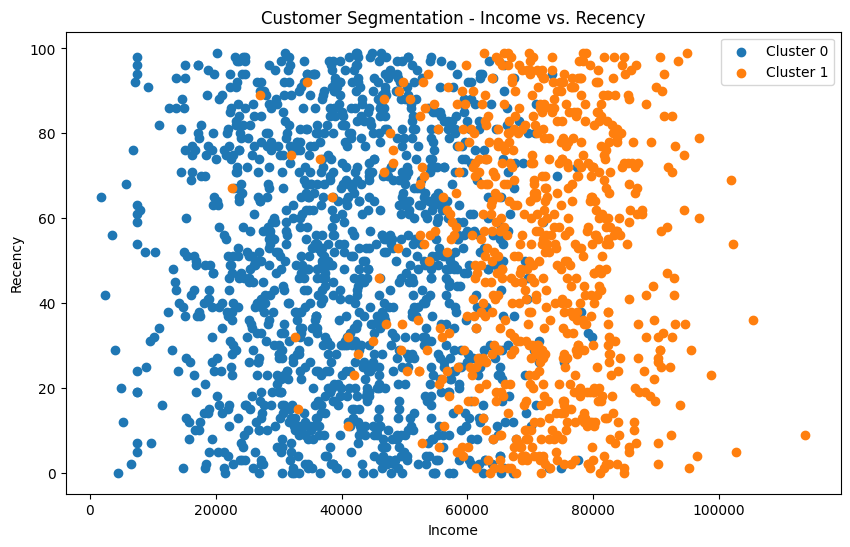

In [8]:
# Visualize the results
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(data[data['Cluster'] == cluster]['Income'],
                data[data['Cluster'] == cluster]['Recency'],
                label=f'Cluster {cluster}')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.title('Customer Segmentation - Income vs. Recency')
plt.legend()
plt.show()

In [9]:
# Analyze the segments and provide insights

cluster_means = data.groupby('Cluster')[features].mean()
print(cluster_means)


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        40278.271963  0.652406  0.587471  48.333843  141.327731   7.372804   
1        72662.488764  0.058989  0.366573  49.886236  610.144663  61.280899   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  
Cluster                                                                    
0              45.870130         9.948816          7.227655     24.597403  
1             387.026685        88.446629         64.113764     79.449438  
